In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Analysis

In [32]:
df = pd.read_csv("Cleaned TMDB Dataset.csv")

# Title is meaningless to our model
df = df.drop(columns=['title'])

# Turn genres into binary columns
df = pd.get_dummies(df, columns=['genres'], drop_first=True)

# Split into train/test data
X = df.drop(columns=['revenue'])
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Set up metrics
def performance(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE  = {mae:.2f}")
    print(f"MSE  = {mse:.2f}")
    print(f"RMSE = {rmse:.2f}")
    print(f"R²   = {r2:.5f}")

### Let's fit a linear regression model to our data and evaluate it using some common metrics

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
performance(y_test, y_pred)

MAE  = 42108853.55
MSE  = 8328191706274189.00
RMSE = 91258926.72
R²   = 0.69212


In [34]:
# Show coefficients and intercept
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print(f"Intercept = {intercept:.2f}")
print("Coefficients:")
print(coefficients.to_string())

Intercept = 336640656.81
Coefficients:
vote_average              2.004901e+06
vote_count                2.471307e+04
runtime                   1.266725e+04
budget                    1.876372e+00
popularity                4.287537e+04
release_year             -1.856008e+05
genres_Adventure          1.681978e+07
genres_Animation          2.258471e+07
genres_Comedy             1.071177e+07
genres_Crime             -9.597254e+06
genres_Documentary        2.232768e+07
genres_Drama              1.347447e+05
genres_Family             2.004434e+07
genres_Fantasy           -1.432834e+06
genres_History            3.385650e+06
genres_Horror             5.448163e+06
genres_Music              1.991257e+07
genres_Mystery           -9.985786e+06
genres_Romance            9.555711e+06
genres_Science Fiction   -8.160150e+06
genres_TV Movie           2.351579e+07
genres_Thriller          -1.993342e+06
genres_War                1.618598e+06
genres_Western           -1.242794e+07


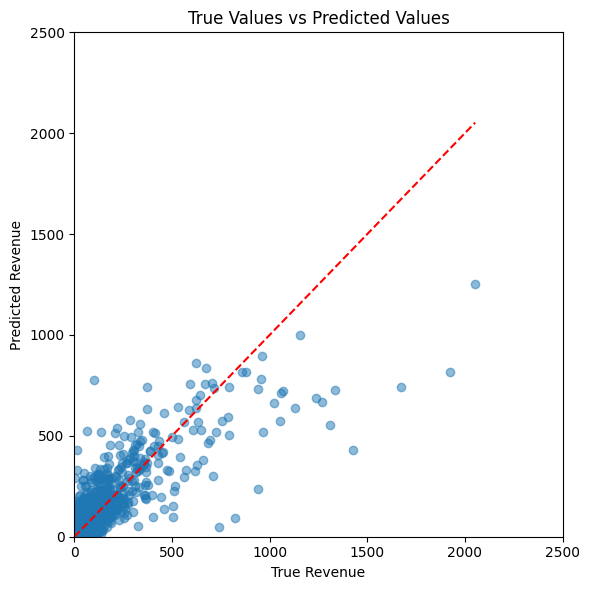

In [35]:
# True Values vs Predicted Values Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test / 1e6, y_pred / 1e6, alpha=0.5)
plt.plot([y_test.min() / 1e6, y_test.max() / 1e6],
         [y_test.min() / 1e6, y_test.max() / 1e6], 'r--')
plt.xlabel('True Revenue')
plt.ylabel('Predicted Revenue')
plt.xlim([0, 2500])
plt.ylim([0, 2500])
plt.title('True Values vs Predicted Values')
plt.tight_layout()
plt.show()

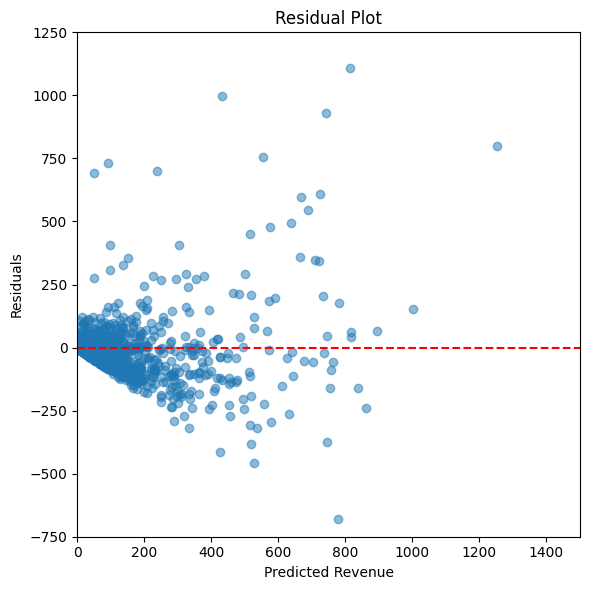

In [36]:
# Residual Plot
residuals = (y_test - y_pred) / 1e6

plt.figure(figsize=(6, 6))
plt.scatter(y_pred / 1e6, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.xlim([0, 1500])
plt.ylim([-750, 1250])
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

Takeaways:
- We can conclude that this model is a reasonable fit to your data considering around 69% of the variance in revenue can be explained by our model.
- There is a pretty large error spread but it is to be expected considering some of the extreme values we have in our data.
- We see from the coefficients that genre has a significant relationship with revenue.
- In our True vs Predicted plot, the model does well in presenting the overall trend but it seems to struggle with extreme values considering the amount of underestimations.

### Test for multicollinearity

In [37]:
var = StandardScaler().fit_transform(X)

# Compute VIF 
vif_df = pd.DataFrame({'Feature': X.columns,
                       'VIF': [variance_inflation_factor(var, i) for i in range(var.shape[1])]})

print(vif_df)

                   Feature       VIF
0             vote_average  1.126673
1               vote_count  1.675716
2                  runtime  1.134962
3                   budget  1.853879
4               popularity  1.078597
5             release_year  1.082632
6         genres_Adventure  1.310756
7         genres_Animation  1.193216
8            genres_Comedy  1.939039
9             genres_Crime  1.250193
10      genres_Documentary  1.132167
11            genres_Drama  2.012178
12           genres_Family  1.115174
13          genres_Fantasy  1.114229
14          genres_History  1.038303
15           genres_Horror  1.398002
16            genres_Music  1.075473
17          genres_Mystery  1.078193
18          genres_Romance  1.166392
19  genres_Science Fiction  1.127505
20         genres_TV Movie  1.002025
21         genres_Thriller  1.241768
22              genres_War  1.054839
23          genres_Western  1.054374


Takeaways:
- Since none of the VIF values are greater than 5, multicollinearity does not present itself as an issue to our model.